<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
from sklearn.datasets import load_diabetes
df = load_diabetes()
df = pd.DataFrame(df.data,columns = df.feature_names)
df['class'] = np.where(df['bmi'] > 0, 1, 0)
print(df['class'].value_counts())
df.head()

class
0    247
1    195
Name: count, dtype: int64


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,class
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0


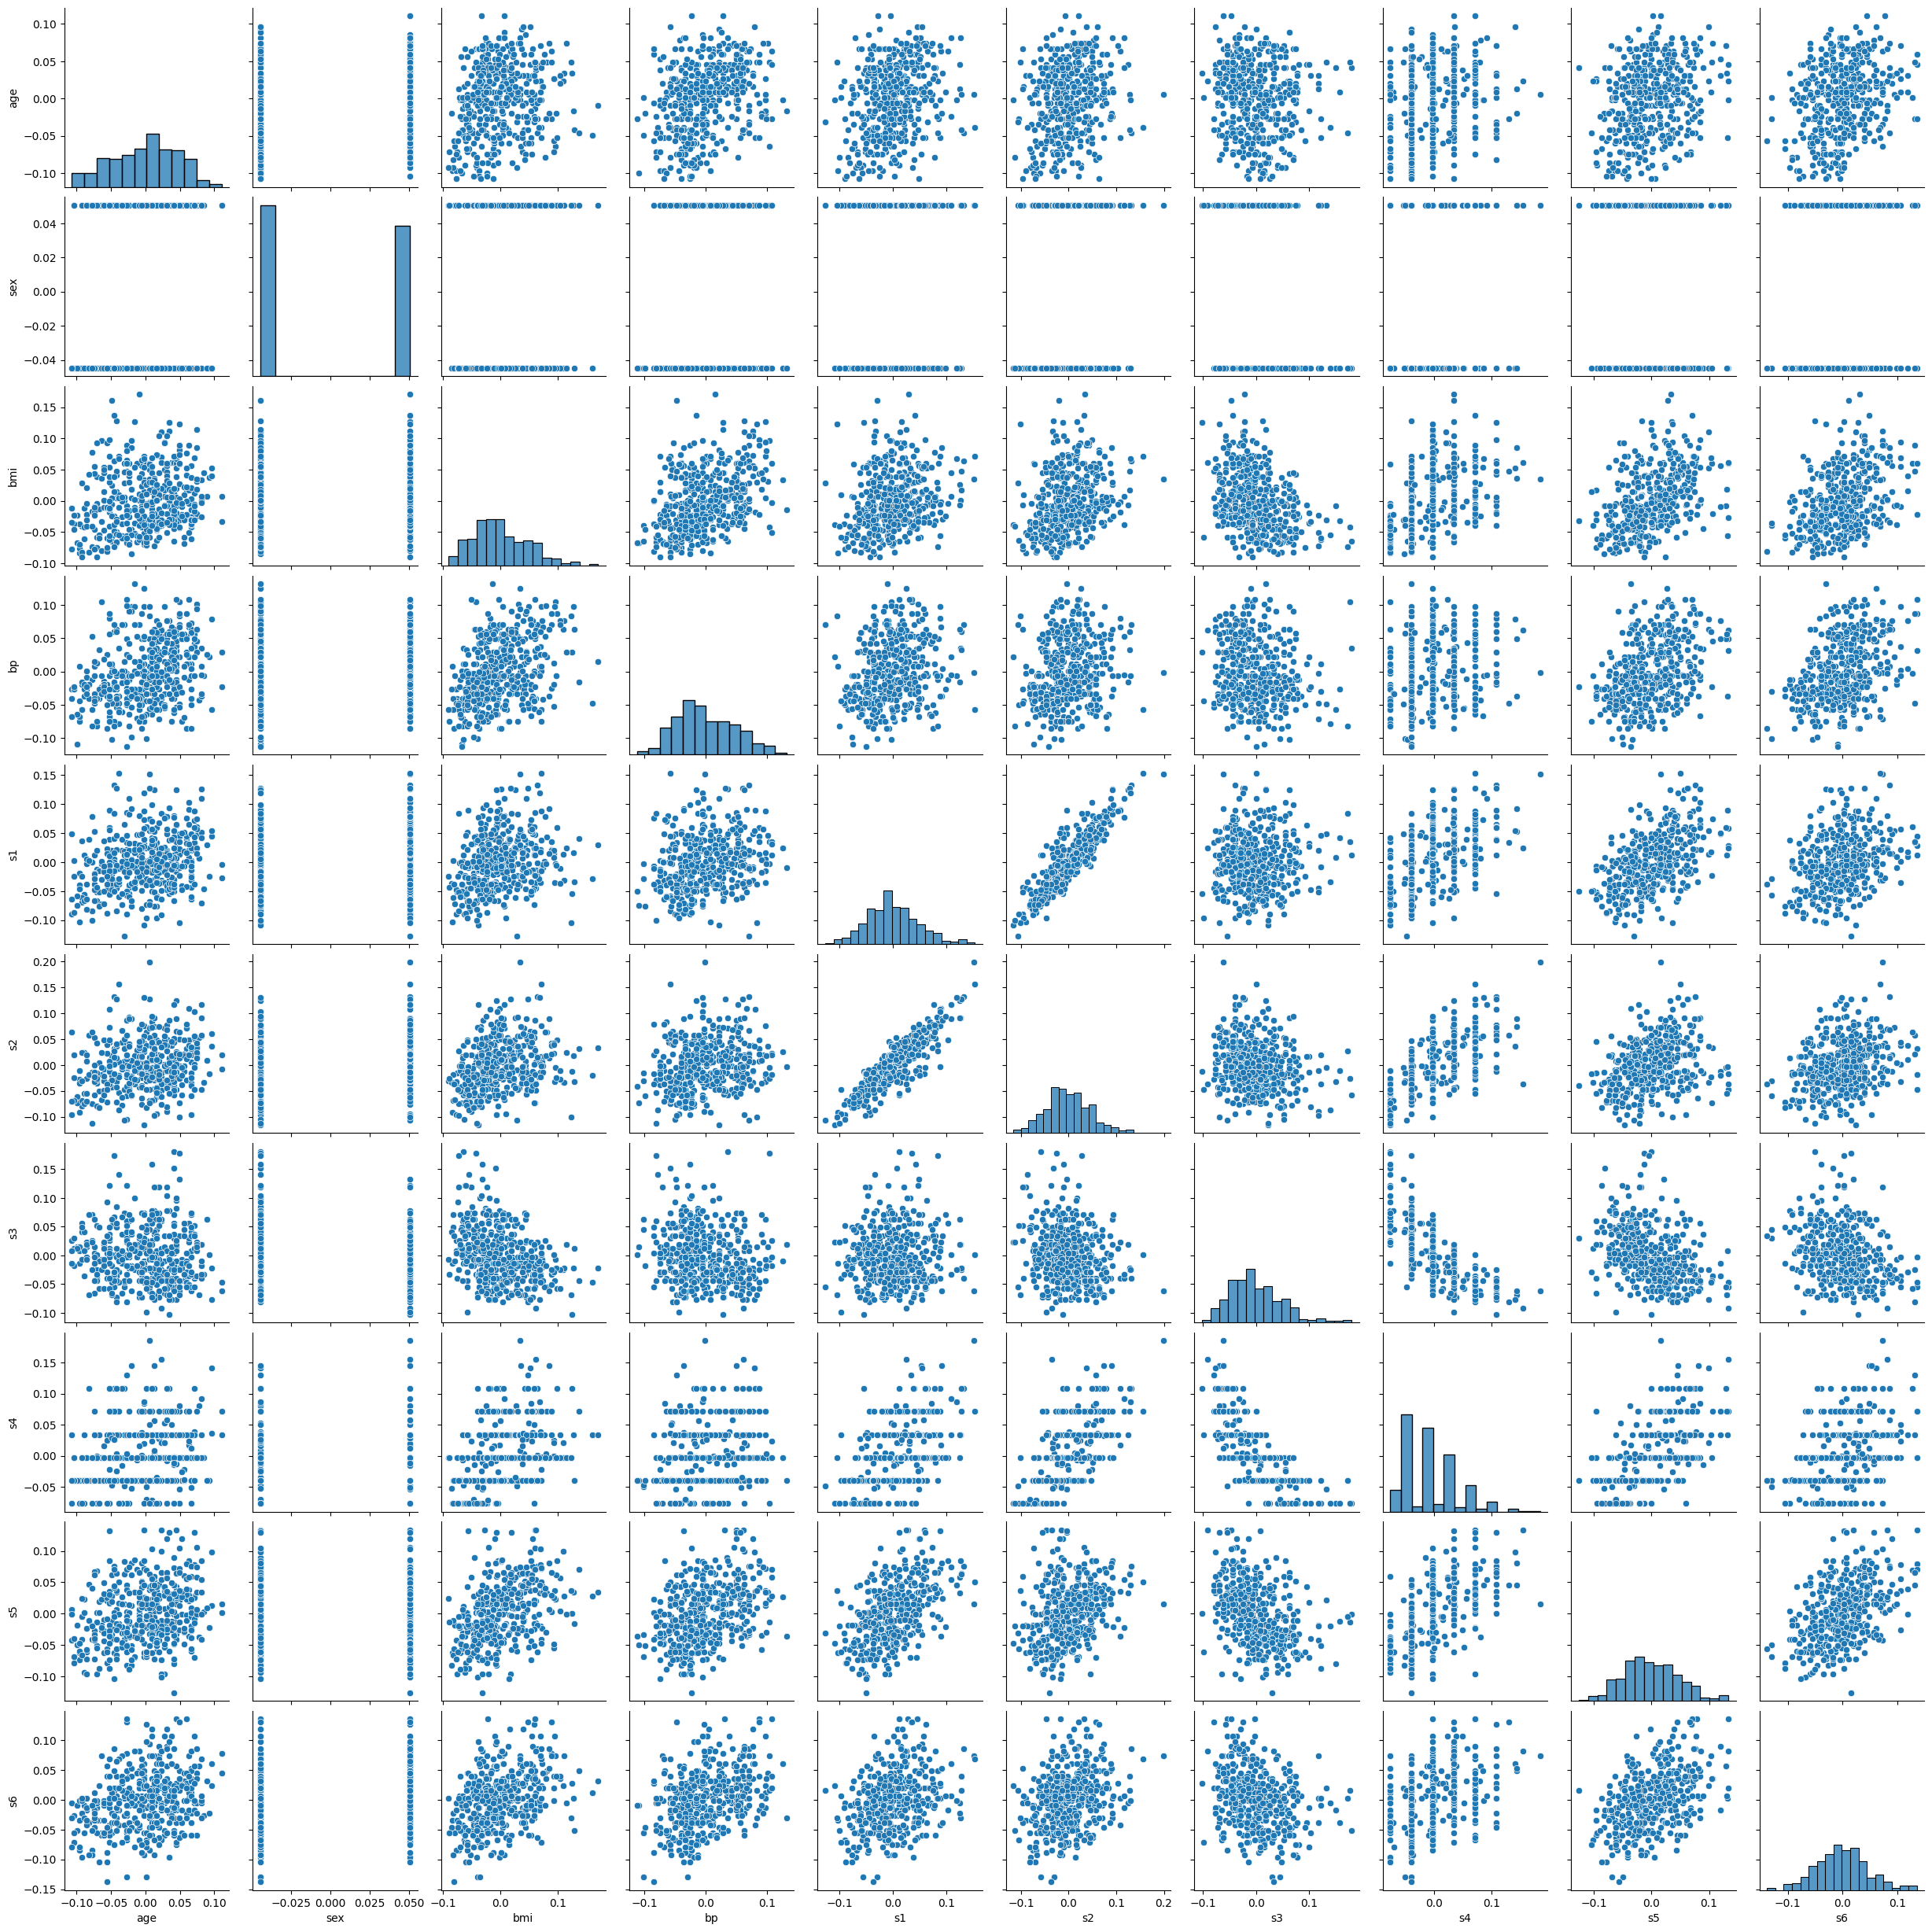

In [15]:
%matplotlib inline
sns.pairplot(df)

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('class',axis = 1),df['class'],test_size = 0.3,random_state = 42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((309, 10), (133, 10), (309,), (133,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(X_test)
print("the accuracy is: ",accuracy_score(y_test,y_pred))
print("the confusion matrix is: \n",confusion_matrix(y_test,y_pred))
print("the classification report is: \n",classification_report(y_test,y_pred))

the accuracy is:  1.0
the confusion matrix is: 
 [[81  0]
 [ 0 52]]
the classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        52

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.02054
Feature: 1, Score: 0.00243
Feature: 2, Score: 0.68591
Feature: 3, Score: 0.04249
Feature: 4, Score: 0.02405
Feature: 5, Score: 0.02499
Feature: 6, Score: 0.04024
Feature: 7, Score: 0.03059
Feature: 8, Score: 0.10147
Feature: 9, Score: 0.02730


In [36]:
y_pred_rf = rf.predict(X_test)
print("the accuracy is: ",accuracy_score(y_test,y_pred_rf))
print("the confusion matrix is: \n",confusion_matrix(y_test,y_pred_rf))
print("the classification report is: \n",classification_report(y_test,y_pred_rf))

the accuracy is:  1.0
the confusion matrix is: 
 [[81  0]
 [ 0 52]]
the classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        52

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



(<Axes: xlabel='Predicted', ylabel='Actual'>,
 Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'))

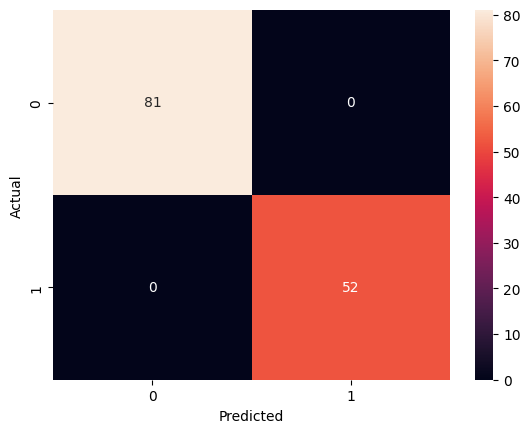

In [37]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot = True),plt.xlabel('Predicted'),plt.ylabel('Actual')